In [15]:
# import os
# if os.path.exists('Imagenes'):   
#     print ('La carpeta ya existe')
# else:
#     os.system('wget -nc https://www.dropbox.com/s/i80af08mp0y5ux5/Imagenes.zip?dl=1')
#     os.system('unzip Imagenes.zip?dl=1')
#     os.system('rm -r Imagenes.zip?dl=1')
#     print('ImAgenes descargadas')

In [16]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Lectura de la imágen

In [17]:
img=cv2.imread(os.getcwd()+'/Micro.png')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

### Arreglos para graficar las corrección gamma

In [18]:
pixX=np.arange(256)/255
# pixX

In [19]:
#Imagen y transformación de pixeles
def grafica(ima, pix):
    plt.figure(figsize=(15,6))
    plt.subplot(1,3,1)
    plt.imshow(ima)
    plt.subplot(1,3,2)
    plt.plot(pixX,pix)
    plt.grid()
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title('Transformacion')
    plt.xlabel('Pixeles originales')
    plt.ylabel('Pixeles transformados')
    plt.subplot(1,3,3)
    R=cv2.calcHist([ima],[0],None,[256],[0,1])
    G=cv2.calcHist([ima],[1],None,[256],[0,1])
    B=cv2.calcHist([ima],[2],None,[256],[0,1])
    graficaHis(R,G,B)    

In [20]:
#Graficar histograma de los 3 canales
def graficaHis(R, G, B):
    plt.plot(pixX, R, 'r')
    plt.plot(pixX, G, 'g')
    plt.plot(pixX, B, 'b')
    plt.title('Histograma')
    plt.xlabel('Niveles')
    plt.ylabel('Densidad')
    plt.grid()
    plt.xlim((0, 1))
    plt.ylim((0, 10000))
    plt.show()

In [21]:
def histograma(var):
    histR=np.zeros(256)
    histG=np.zeros(256)
    histB=np.zeros(256)
    
    for i in range(2):
        for j in range(2):
            histR[var[i,j,0]]=histR[var[i,j,0]]+1    
            histG[var[i,j,1]]=histG[var[i,j,1]]+1 
            histB[var[i,j,2]]=histB[var[i,j,2]]+1 
            
    graficaHis(histR, histG, histB)


### Recordar:
Antes de realizar una operación es recomentable cambiar el tipo de dato para no tener perdidas en las operaciones.

In [22]:
#Normalizar la imagen y de los pixeles
imgN=np.array(img, np.float32)/255.

## Correción gamma
La correción gamma, es como se denomina cierta operación no lineal que se usa para codificar y decodificar la luminancia o valores triestimulos en sistemas de video o imagen. Esta operación es, en su forma más sencilla, definida por la siguiente ley de potencias:

$$f(x,y)_{out}=A*f(x,y)^{\gamma}_{in}$$

En donde $A$ en algunos casos suele tener valor unitario.
A continuación se realiza la operación gamma

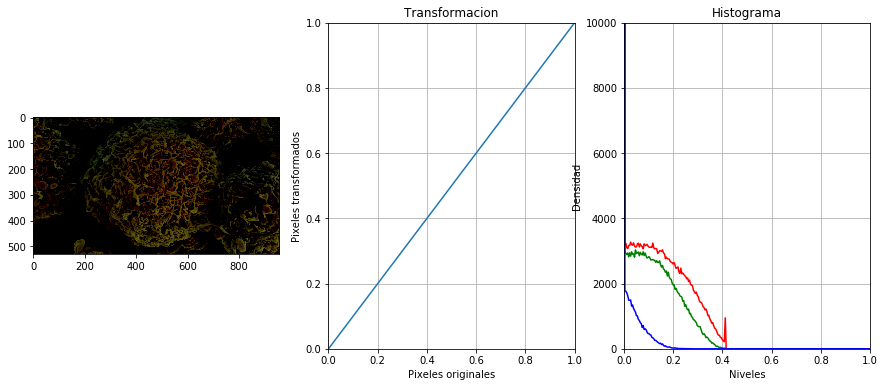

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [23]:
gam=1.0
img2=imgN**gam
pixyN=pixX**gam
grafica(img2, pixyN)
histograma(img2)


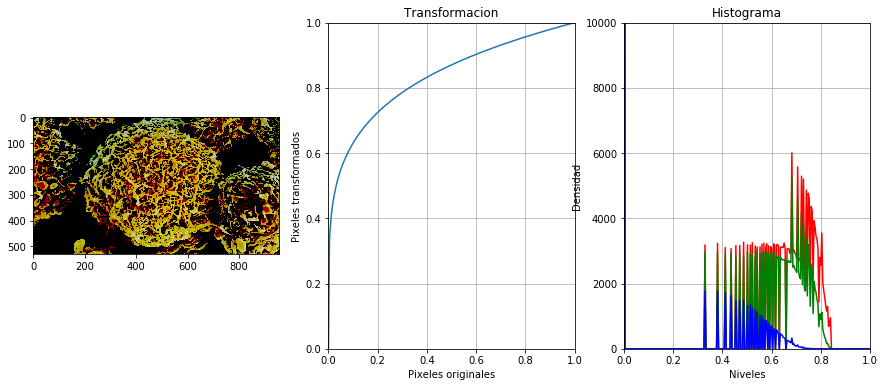

In [8]:
gam=0.2
img2=imgN**gam
pixyN=pixX**gam
grafica(img2, pixyN)

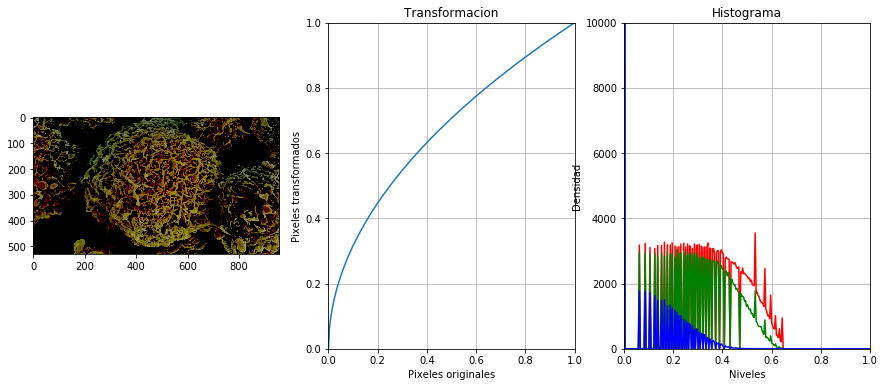

In [9]:
gam=0.5
img2=imgN**gam
pixyN=pixX**gam
grafica(img2, pixyN)

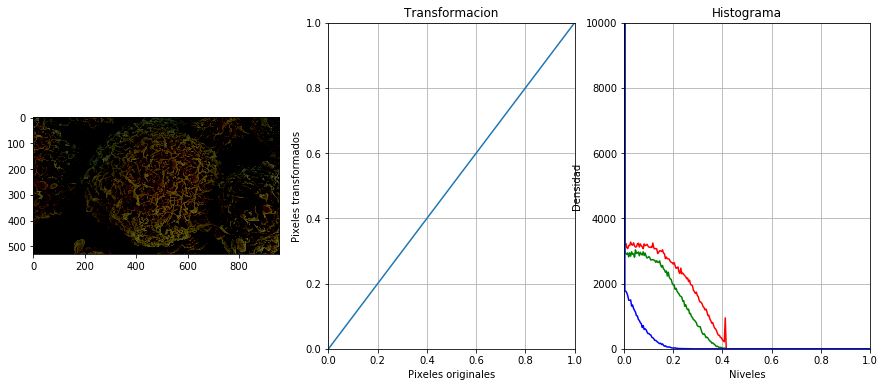

In [11]:
gam=1.0
img2=imgN**gam
pixyN=pixX**gam
grafica(img2, pixyN)

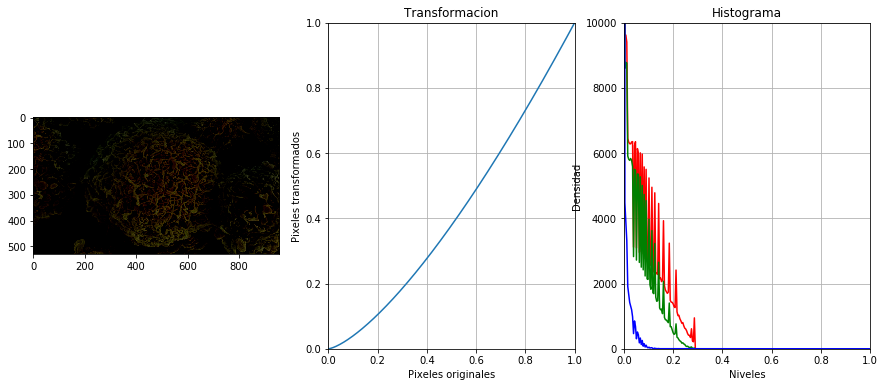

In [12]:
gam=1.4
img2=imgN**gam
pixyN=pixX**gam
grafica(img2, pixyN)

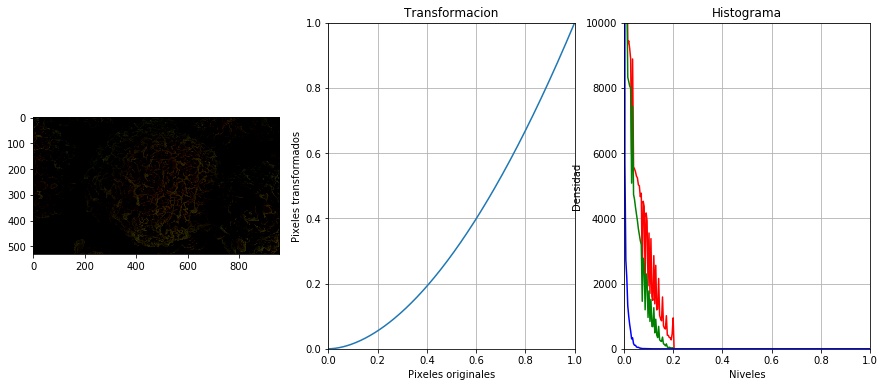

In [13]:
gam=1.8
img2=imgN**gam
pixyN=pixX**gam
grafica(img2, pixyN)

# Ecualización del histograma
La ecualización de histograma es un método en el procesamiento de imágenes de ajuste de contraste utilizando el histograma de la imagen.

Este método generalmente aumenta el contraste global de muchas imágenes, especialmente cuando los datos utilizables de la imagen están representados por valores de contraste cercanos. A través de este ajuste, las intensidades se pueden distribuir mejor en el histograma. Esto permite que las áreas de menor contraste local obtengan un mayor contraste. La ecualización del histograma logra esto mediante la distribución efectiva de los valores de intensidad más frecuentes. El método es útil en imágenes con fondos y primeros planos que son brillantes u oscuros.

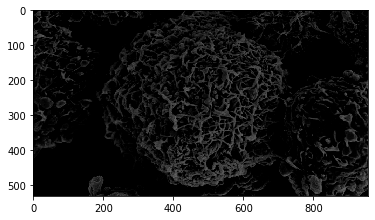

In [27]:
imgG=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img0=np.array(imgG, np.dtype('float32'))
plt.imshow(img0, cmap='gray', vmin=0, vmax=255)

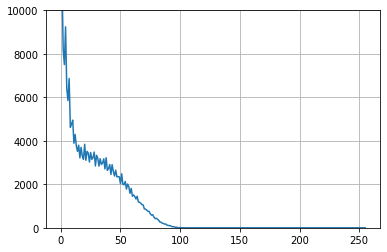

In [11]:
HG = cv2.calcHist([img0],[0],None,[256],[0,256])
plt.plot(HG)
plt.ylim((0, 10000))
plt.grid()

In [28]:
ima1=img0-np.min(img0)

In [29]:
ima1=ima1*255/np.max(ima1)
# np.max(ima1)

255.0

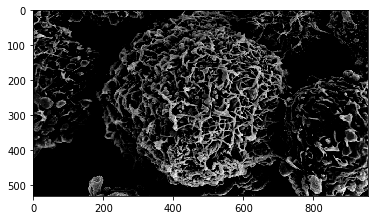

In [14]:
plt.imshow(ima1, cmap='gray', vmin=0, vmax=255)

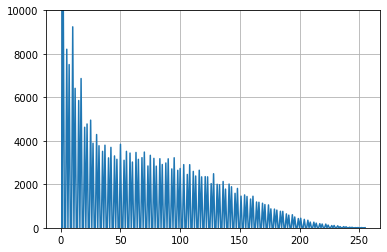

In [15]:
HG2 = cv2.calcHist([ima1],[0],None,[256],[0,256])
plt.plot(HG2)
plt.ylim((0, 10000))
plt.grid()

### OpenCV 
tiene una función para hacer esto, cv2.equalizeHist () . Su entrada es solo una imagen en escala de grises y la salida es nuestra imagen ecualizada de histograma.

In [16]:
equ = cv2.equalizeHist(imgG)

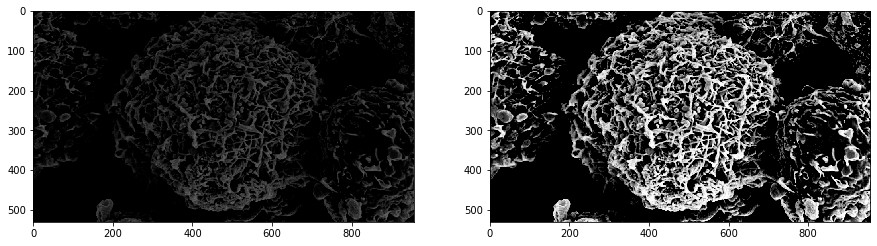

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.imshow(imgG, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(equ, cmap='gray',vmin=0, vmax=255)